In [35]:
import numpy as np
import pandas as pd
from scipy.signal import waveforms
import pyDAW

raw_file = "/home/daq/daq_2730/CoMPASS-v2.4.1/veto/DAQ/Single_Photon/RAW/DataR_CH0@VX2730_53013_Single_Photon_1.CSV"
raw_file2 = "/home/daq/daq_2730/CoMPASS-v2.4.1/veto/DAQ/Single_Photon/RAW/DataR_CH1@VX2730_53013_Single_Photon_1.CSV"
df = pd.read_csv(raw_file, delimiter=";", skiprows=1)
df2= pd.read_csv(raw_file2, delimiter=";", skiprows=1)
waveform=df.to_numpy()
waveforms2=df2.to_numpy()

FileNotFoundError: [Errno 2] No such file or directory: '/home/daq/daq_2730/CoMPASS-v2.4.1/veto/DAQ/Single_Photon/RAW/DataR_CH0@VX2730_53013_Single_Photon_1.CSV'

Text(0, 0.5, 'Amplitude')

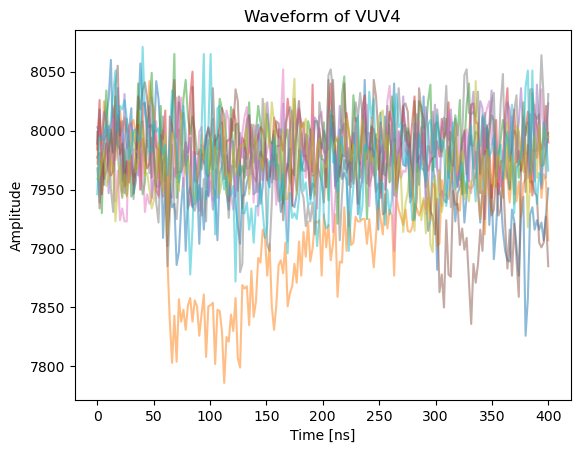

In [27]:
import matplotlib.pyplot as plt
wave_len = waveform[:, 7:].shape[1]
for j in range(10):
    plt.plot(np.linspace(0, 2 * wave_len, wave_len), waveform[j, 7:], alpha=0.5)
plt.title("Waveform of VUV4")
plt.xlabel("Time [ns]")
plt.ylabel("Amplitude")


In [31]:
charge=np.sum(waveform[:, 7+25:7+200]-np.mean(waveform[:,7:7+20]), axis=1)
charge2=np.sum(waveforms2[:, 7+25:7+200]-np.mean(waveform2[:,7:7+20]), axis=1)

peak=np.min(waveform[:, 7+20:7+60]-np.mean(waveform[:,7:7+20]), axis=1)
peak2=np.min(waveforms2[:, 7+20:7+60]-np.mean(waveform2[:,7:7+20]), axis=1)
# plt.hist(charge, bins=100)
plt.hist(peak, bins=100)

NameError: name 'waveforms2' is not defined

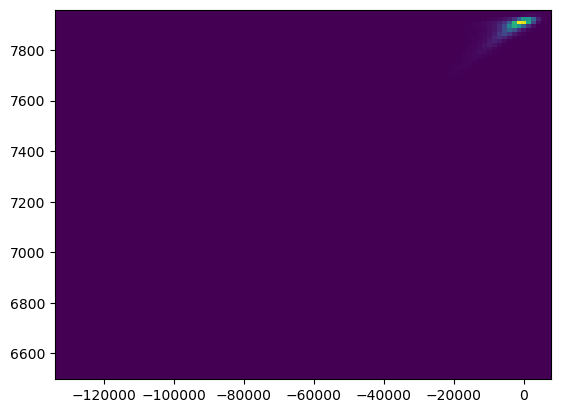

In [32]:
plt.hist2d(charge, peak, bins=100)
plt.show()

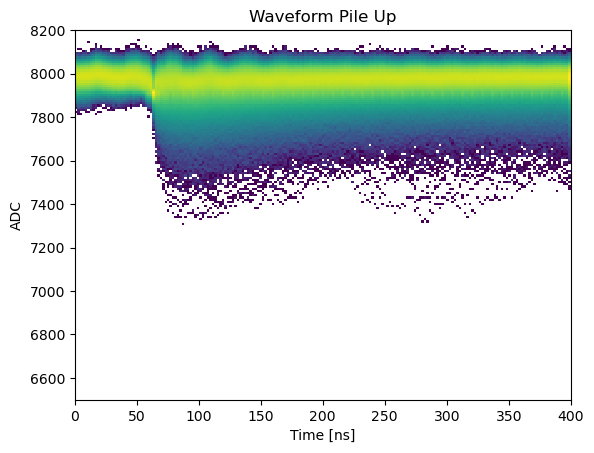

In [23]:
from matplotlib.colors import LogNorm

num = 100000
a = []
for i in range(num):
    a.append(np.linspace(2, 400, 200))

a = np.array(object=a).flatten()

plt.hist2d(
    a,
    waveform[:num, 7:].flatten(),
    bins=[np.linspace(0, 400, 200), np.linspace(6500, 8200, 170)],
    norm=LogNorm(),
)


plt.xlabel("Time [ns]")
plt.ylabel("ADC")
plt.title("Waveform Pile Up")


plt.show()